# Project Title

# Used car price prediction using Machine Learning

# Dataset link:[True Value Cars](https://www.kaggle.com/focusedmonk/true-value-cars-dataset)

# **CONTENT**


### 1.   Context
### 2.  Problem Statement
### 3. Importing Libraries
### 4. Loading Train data
### 5. Information about Data
### 6. Correlation
### 7.Handling missing values
### 8.Handling Outliers
### 9.Exploratory Data Analysis
### 10.Loading and Handling Test Data
### 11.Training our Models

*  Linear Regression
*  Lasso Regression
*  Ridge Regression
*  Random Forest Regression
*  XGBoost Regression

### 12.Model Evaluation
### 13.Conclusion




# 1.  Context

**What determines the price of used cars?**

The value of a car drops right from the moment it is bought and the depreciation continues with each passing year.

In fact, in the first year itself, the value of a car decreases by 20 percent of its initial value.

The make and model of a car, total kilometers driven, overall condition of the vehicle and various other factors further affect the car’s resale value.

# 2.Problem Statement

The prices of new cars in the industry is fixed by the manufacturer with some additional costs
incurred by the Government in the form of taxes. So, customers buying a new car can be
assured of the money they invest to be worthy. But due to the increased price of new cars and
the inability of customers to buy new cars due to the lack of funds, used cars sales are on a
global increase (Pal, Arora and Palakurthy, 2018). There is a need for a used car price
prediction system to effectively determine the worthiness of the car using a variety of features.
Even though there are websites that offers this service, their prediction method may not be the
best. Besides, different models and systems may contribute on predicting power for a used car’s
actual market value. It is important to know their actual market value while both buying and
selling.


# 3. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 4. Loading Train data

In [2]:
df=pd.read_csv('train.csv')


In [3]:
df.head()

,id,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,...,total_owners,broker_quote,original_price,car_rating,ad_created_on,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail
0,1,maruti swift,2015,petrol,8063,386399,noida,18715,hatchback,manual,...,2,397677,404177.0,great,2021-04-04T07:09:18.583,True,8975,57960,False,False
1,2,maruti alto 800,2016,petrol,23104,265499,noida,2676,hatchback,manual,...,1,272935,354313.0,great,2021-03-22T14:07:32.833,True,6167,39825,False,False
2,3,hyundai grand i10,2017,petrol,23402,477699,noida,609,hatchback,manual,...,1,469605,NaN,great,2021-03-20T05:36:31.311,True,11096,71655,False,False
3,4,maruti swift,2013,diesel,39124,307999,noida,6511,hatchback,manual,...,1,294262,374326.0,great,2021-01-21T12:59:19.299,True,7154,46200,False,False
4,5,hyundai grand i10,2015,petrol,22116,361499,noida,3225,hatchback,manual,...,1,360716,367216.0,great,2021-04-01T13:33:40.733,True,8397,54225,False,False


# 5.Information about Data

In [4]:
df.shape 

(6399, 30)

In [5]:
df.columns 

Index(['id', 'car_name', 'yr_mfr', 'fuel_type', 'kms_run', 'sale_price',
       'city', 'times_viewed', 'body_type', 'transmission', 'variant',
       'assured_buy', 'registered_city', 'registered_state', 'is_hot', 'rto',
       'source', 'make', 'model', 'car_availability', 'total_owners',
       'broker_quote', 'original_price', 'car_rating', 'ad_created_on',
       'fitness_certificate', 'emi_starts_from', 'booking_down_pymnt',
       'reserved', 'warranty_avail'],
      dtype='object')

In [6]:
df['car_name'].value_counts()

maruti swift               478
maruti swift dzire         332
hyundai i10                330
maruti wagon r 1.0         292
hyundai grand i10          246
                          ... 
volkswagen cross polo        1
mercedes benz cls class      1
chevrolet sail uva           1
tata sumo gold               1
fiat punto pure              1
Name: car_name, Length: 182, dtype: int64

In [7]:
df['city'].value_counts()

mumbai       1144
bengaluru    1069
new delhi     986
pune          670
chennai       627
hyderabad     549
ahmedabad     354
gurgaon       313
noida         277
ghaziabad     194
faridabad     102
lucknow        91
kolkata        23
Name: city, dtype: int64

In [8]:
df['sale_price'].value_counts()

300000    20
350000    14
250000    14
150000    13
400000    12
          ..
866699     1
156299     1
309799     1
772199     1
530399     1
Name: sale_price, Length: 4118, dtype: int64

In [9]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6399 entries, 0 to 6398
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   6399 non-null   int64  
 1   car_name             6399 non-null   object 
 2   yr_mfr               6399 non-null   int64  
 3   fuel_type            6399 non-null   object 
 4   kms_run              6399 non-null   int64  
 5   sale_price           6399 non-null   int64  
 6   city                 6399 non-null   object 
 7   times_viewed         6399 non-null   int64  
 8   body_type            6309 non-null   object 
 9   transmission         5925 non-null   object 
 10  variant              6399 non-null   object 
 11  assured_buy          6399 non-null   bool   
 12  registered_city      6391 non-null   object 
 13  registered_state     6391 non-null   object 
 14  is_hot               6399 non-null   bool   
 15  rto                  6399 non-null   o

In [10]:
df.nunique(axis=0) 

id                     6399
car_name                182
yr_mfr                   24
fuel_type                 5
kms_run                6243
sale_price             4118
city                     13
times_viewed           2954
body_type                 5
transmission              2
variant                 873
assured_buy               2
registered_city         230
registered_state         16
is_hot                    2
rto                     255
source                    3
make                     26
model                   182
car_availability          4
total_owners              6
broker_quote           5693
original_price         3476
car_rating                4
ad_created_on          6398
fitness_certificate       2
emi_starts_from        4048
booking_down_pymnt     4048
reserved                  2
warranty_avail            2
dtype: int64

In [11]:
df.duplicated().sum() 

0

**No duplicate records**

In [12]:
df.isnull().sum() 

id                        0
car_name                  0
yr_mfr                    0
fuel_type                 0
kms_run                   0
sale_price                0
city                      0
times_viewed              0
body_type                90
transmission            474
variant                   0
assured_buy               0
registered_city           8
registered_state          8
is_hot                    0
rto                       0
source                  114
make                      0
model                     0
car_availability        542
total_owners              0
broker_quote              0
original_price         2824
car_rating                7
ad_created_on             1
fitness_certificate       8
emi_starts_from           0
booking_down_pymnt        0
reserved                  0
warranty_avail            0
dtype: int64

# 6. Correlation

In [13]:
corr=df.corr() 
corr

,id,yr_mfr,kms_run,sale_price,times_viewed,assured_buy,is_hot,total_owners,broker_quote,original_price,emi_starts_from,booking_down_pymnt,reserved,warranty_avail
id,1.000000,0.089709,0.015080,0.032071,0.009603,0.023037,-0.080135,-0.009446,0.008309,-0.000049,0.032071,0.032071,0.004702,0.014275
yr_mfr,0.089709,1.000000,-0.396612,0.521379,0.067565,0.119977,0.204486,-0.295556,0.542951,0.502866,0.521379,0.521379,0.100374,-0.003712
kms_run,0.015080,-0.396612,1.000000,-0.098388,-0.115663,-0.015230,-0.118013,0.136007,-0.121848,-0.082849,-0.098389,-0.098388,-0.081682,0.016345
sale_price,0.032071,0.521379,-0.098388,1.000000,0.098256,0.032198,0.065627,-0.127794,0.961021,0.986196,1.000000,1.000000,0.054197,-0.013129
times_viewed,0.009603,0.067565,-0.115663,0.098256,1.000000,0.079840,0.184748,0.002830,0.131855,0.092438,0.098256,0.098256,0.223501,-0.047353
assured_buy,0.023037,0.119977,-0.015230,0.032198,0.079840,1.000000,0.380024,-0.073470,0.078595,0.009191,0.032197,0.032198,0.071509,-0.027761
is_hot,-0.080135,0.204486,-0.118013,0.065627,0.184748,0.380024,1.000000,-0.125427,0.184548,0.010380,0.065626,0.065628,0.147890,-0.348627
total_owners,-0.009446,-0.295556,0.136007,-0.127794,0.002830,-0.073470,-0.125427,1.000000,-0.150618,-0.080680,-0.127793,-0.127794,-0.056257,0.011473
broker_quote,0.008309,0.542951,-0.121848,0.961021,0.131855,0.078595,0.184548,-0.150618,1.000000,0.985439,0.961020,0.961021,0.085843,-0.061038
original_price,-0.000049,0.502866,-0.082849,0.986196,0.092438,0.009191,0.010380,-0.080680,0.985439,1.000000,0.986196,0.986196,0.080518,-0.004814


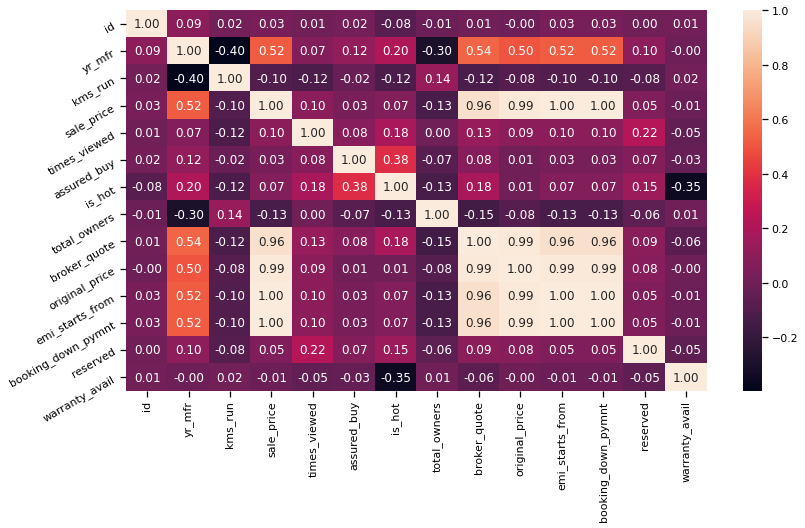

In [14]:
corr = df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
a = sns.heatmap(corr, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

In [15]:
def remove(df):
  df1=df.drop(['id','emi_starts_from','original_price','broker_quote'],axis=1)
  return df1
df1=remove(df)

In [16]:
df1

,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,...,make,model,car_availability,total_owners,car_rating,ad_created_on,fitness_certificate,booking_down_pymnt,reserved,warranty_avail
0,maruti swift,2015,petrol,8063,386399,noida,18715,hatchback,manual,lxi opt,...,maruti,swift,in_stock,2,great,2021-04-04T07:09:18.583,True,57960,False,False
1,maruti alto 800,2016,petrol,23104,265499,noida,2676,hatchback,manual,lxi,...,maruti,alto 800,in_stock,1,great,2021-03-22T14:07:32.833,True,39825,False,False
2,hyundai grand i10,2017,petrol,23402,477699,noida,609,hatchback,manual,sports 1.2 vtvt,...,hyundai,grand i10,in_stock,1,great,2021-03-20T05:36:31.311,True,71655,False,False
3,maruti swift,2013,diesel,39124,307999,noida,6511,hatchback,manual,vdi,...,maruti,swift,in_stock,1,great,2021-01-21T12:59:19.299,True,46200,False,False
4,hyundai grand i10,2015,petrol,22116,361499,noida,3225,hatchback,manual,magna 1.2 vtvt,...,hyundai,grand i10,in_stock,1,great,2021-04-01T13:33:40.733,True,54225,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6394,toyota fortuner,2012,diesel,116838,1100000,lucknow,327,luxury suv,manual,3.0 mt 4x2,...,toyota,fortuner,NaN,2,good,2019-09-06T04:20:28.916,False,165000,False,True
6395,hyundai i20,2012,diesel,47317,370000,lucknow,214,hatchback,manual,sportz 1.4 crdi 6 speed bs iv,...,hyundai,i20,NaN,1,overpriced,2019-09-02T09:43:11.541,False,55500,False,True
6396,toyota innova,2009,diesel,274167,415000,lucknow,247,suv,manual,2.5 g4 7 str,...,toyota,innova,NaN,2,overpriced,2019-08-28T14:42:16.246,False,62250,False,False
6397,tata indica ev2,2011,diesel,119634,150000,lucknow,157,hatchback,manual,lx,...,tata,indica ev2,NaN,2,overpriced,2019-08-26T06:10:57.269,False,22500,False,False


In [17]:
df1.head()

,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,...,make,model,car_availability,total_owners,car_rating,ad_created_on,fitness_certificate,booking_down_pymnt,reserved,warranty_avail
0,maruti swift,2015,petrol,8063,386399,noida,18715,hatchback,manual,lxi opt,...,maruti,swift,in_stock,2,great,2021-04-04T07:09:18.583,True,57960,False,False
1,maruti alto 800,2016,petrol,23104,265499,noida,2676,hatchback,manual,lxi,...,maruti,alto 800,in_stock,1,great,2021-03-22T14:07:32.833,True,39825,False,False
2,hyundai grand i10,2017,petrol,23402,477699,noida,609,hatchback,manual,sports 1.2 vtvt,...,hyundai,grand i10,in_stock,1,great,2021-03-20T05:36:31.311,True,71655,False,False
3,maruti swift,2013,diesel,39124,307999,noida,6511,hatchback,manual,vdi,...,maruti,swift,in_stock,1,great,2021-01-21T12:59:19.299,True,46200,False,False
4,hyundai grand i10,2015,petrol,22116,361499,noida,3225,hatchback,manual,magna 1.2 vtvt,...,hyundai,grand i10,in_stock,1,great,2021-04-01T13:33:40.733,True,54225,False,False


In [18]:
df1.isnull().sum()

car_name                 0
yr_mfr                   0
fuel_type                0
kms_run                  0
sale_price               0
city                     0
times_viewed             0
body_type               90
transmission           474
variant                  0
assured_buy              0
registered_city          8
registered_state         8
is_hot                   0
rto                      0
source                 114
make                     0
model                    0
car_availability       542
total_owners             0
car_rating               7
ad_created_on            1
fitness_certificate      8
booking_down_pymnt       0
reserved                 0
warranty_avail           0
dtype: int64

In [19]:
df1.shape

(6399, 26)

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6399 entries, 0 to 6398
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_name             6399 non-null   object
 1   yr_mfr               6399 non-null   int64 
 2   fuel_type            6399 non-null   object
 3   kms_run              6399 non-null   int64 
 4   sale_price           6399 non-null   int64 
 5   city                 6399 non-null   object
 6   times_viewed         6399 non-null   int64 
 7   body_type            6309 non-null   object
 8   transmission         5925 non-null   object
 9   variant              6399 non-null   object
 10  assured_buy          6399 non-null   bool  
 11  registered_city      6391 non-null   object
 12  registered_state     6391 non-null   object
 13  is_hot               6399 non-null   bool  
 14  rto                  6399 non-null   object
 15  source               6285 non-null   object
 16  make  

<AxesSubplot:>

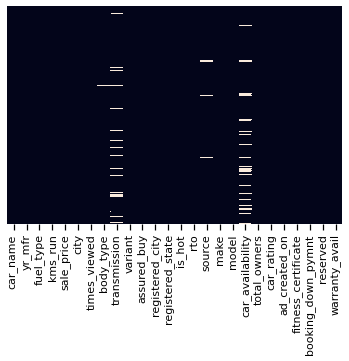

In [21]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False)

# 7.Handling missing values

In [22]:
df1.dtypes

car_name               object
yr_mfr                  int64
fuel_type              object
kms_run                 int64
sale_price              int64
city                   object
times_viewed            int64
body_type              object
transmission           object
variant                object
assured_buy              bool
registered_city        object
registered_state       object
is_hot                   bool
rto                    object
source                 object
make                   object
model                  object
car_availability       object
total_owners            int64
car_rating             object
ad_created_on          object
fitness_certificate    object
booking_down_pymnt      int64
reserved                 bool
warranty_avail           bool
dtype: object

In [23]:
for i in df.columns:
  print(i)
  print(df[i].unique())


id
[   1    2    3 ... 6397 6398 6399]
car_name
['maruti swift' 'maruti alto 800' 'hyundai grand i10' 'maruti alto k10'
 'maruti ritz' 'hyundai i20' 'hyundai elite i20' 'renault kwid'
 'hyundai i10' 'honda brio' 'honda city' 'hyundai eon' 'hyundai verna'
 'maruti alto' 'hyundai santro xing' 'maruti swift dzire' 'ford ecosport'
 'nissan sunny' 'hyundai xcent' 'toyota etios liva' 'maruti celerio'
 'maruti baleno' 'hyundai new elantra' 'honda amaze' 'hyundai creta'
 'maruti wagon r 1.0' 'audi q3' 'maruti vitara brezza'
 'toyota corolla altis' 'toyota innova' 'renault scala' 'maruti dzire'
 'renault duster' 'tata tiago' 'maruti ertiga' 'datsun redi go'
 'honda wr-v' 'mahindra xuv500' 'maruti sx4' 'volkswagen polo'
 'maruti zen estilo' 'mahindra scorpio' 'toyota innova crysta' 'ford figo'
 'mitsubishi outlander' 'volkswagen ameo' 'nissan terrano' 'toyota etios'
 'volkswagen vento' 'audi a6' 'toyota fortuner' 'mahindra tuv300'
 'maruti new  wagon-r' 'maruti xl6' 'tata harrier' 'honda civic'


In [24]:
category_columns=df1.select_dtypes(include=['object']).columns.tolist()
integer_columns=df1.select_dtypes(include=['int64','float64']).columns.tolist()

for column in df1:
    if df1[column].isnull().any():
        if(column in category_columns):
            df1[column]=df1[column].fillna(df1[column].mode()[0])
        else:
            df1[column]=df1[column].fillna(df1[column].mean)

In [25]:
df1.head()

,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,...,make,model,car_availability,total_owners,car_rating,ad_created_on,fitness_certificate,booking_down_pymnt,reserved,warranty_avail
0,maruti swift,2015,petrol,8063,386399,noida,18715,hatchback,manual,lxi opt,...,maruti,swift,in_stock,2,great,2021-04-04T07:09:18.583,True,57960,False,False
1,maruti alto 800,2016,petrol,23104,265499,noida,2676,hatchback,manual,lxi,...,maruti,alto 800,in_stock,1,great,2021-03-22T14:07:32.833,True,39825,False,False
2,hyundai grand i10,2017,petrol,23402,477699,noida,609,hatchback,manual,sports 1.2 vtvt,...,hyundai,grand i10,in_stock,1,great,2021-03-20T05:36:31.311,True,71655,False,False
3,maruti swift,2013,diesel,39124,307999,noida,6511,hatchback,manual,vdi,...,maruti,swift,in_stock,1,great,2021-01-21T12:59:19.299,True,46200,False,False
4,hyundai grand i10,2015,petrol,22116,361499,noida,3225,hatchback,manual,magna 1.2 vtvt,...,hyundai,grand i10,in_stock,1,great,2021-04-01T13:33:40.733,True,54225,False,False


In [26]:
df1.isnull().sum()

car_name               0
yr_mfr                 0
fuel_type              0
kms_run                0
sale_price             0
city                   0
times_viewed           0
body_type              0
transmission           0
variant                0
assured_buy            0
registered_city        0
registered_state       0
is_hot                 0
rto                    0
source                 0
make                   0
model                  0
car_availability       0
total_owners           0
car_rating             0
ad_created_on          0
fitness_certificate    0
booking_down_pymnt     0
reserved               0
warranty_avail         0
dtype: int64

<AxesSubplot:>

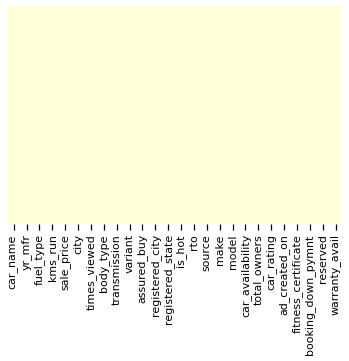

In [27]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [28]:
df1.describe() 

,yr_mfr,kms_run,sale_price,times_viewed,total_owners,booking_down_pymnt
count,6399.000000,6399.000000,6.399000e+03,6399.000000,6399.000000,6399.000000
mean,2013.895921,62382.210970,4.546049e+05,1534.860916,1.325988,68190.888576
std,3.088329,43087.788245,2.779465e+05,1965.452173,0.574816,41692.006252
min,1996.000000,60.000000,0.000000e+00,3.000000,1.000000,0.000000
25%,2012.000000,31555.000000,2.822990e+05,554.000000,1.000000,42345.000000
50%,2014.000000,55490.000000,3.820990e+05,1080.000000,1.000000,57315.000000
75%,2016.000000,84145.000000,5.400000e+05,1912.000000,2.000000,81000.000000
max,2021.000000,996609.000000,3.600000e+06,46141.000000,6.000000,540000.000000


In [29]:
df1.describe(include='object')

,car_name,fuel_type,city,body_type,transmission,variant,registered_city,registered_state,rto,source,make,model,car_availability,car_rating,ad_created_on
count,6399,6399,6399,6399,6399,6399,6399,6399,6399,6399,6399,6399,6399,6399,6399
unique,182,5,13,5,2,873,230,16,255,3,26,182,4,4,6398
top,maruti swift,petrol,mumbai,hatchback,manual,vxi,delhi,maharashtra,mh12,inperson_sale,maruti,swift,in_stock,great,2019-02-20T14:13:30.464
freq,478,4001,1144,3888,5855,573,840,1820,331,6018,2756,478,6146,5454,2


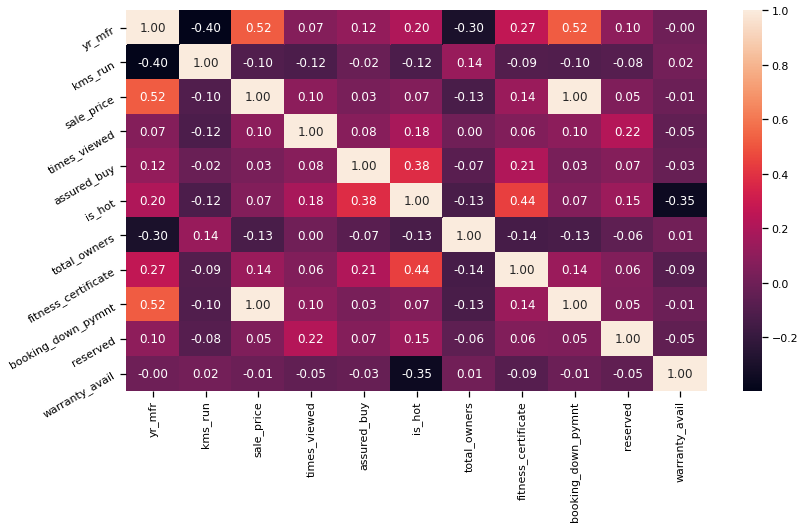

In [30]:
corr = df1.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
a = sns.heatmap(corr, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

# 8.Handling Outliers

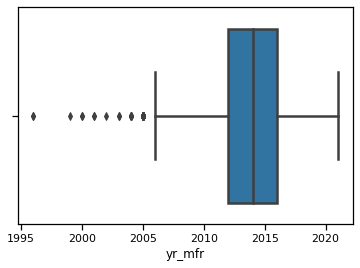

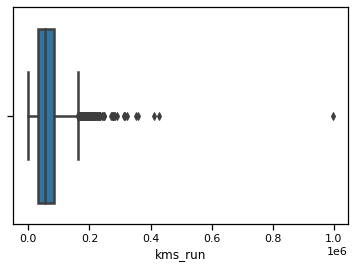

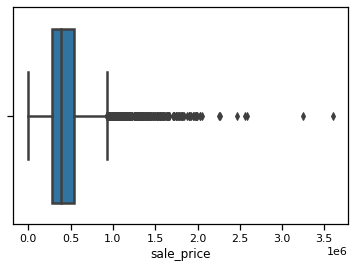

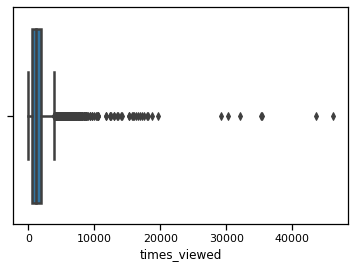

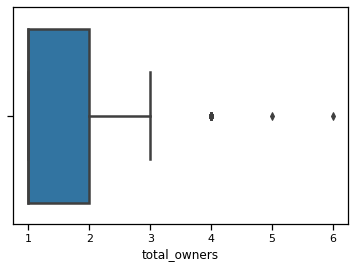

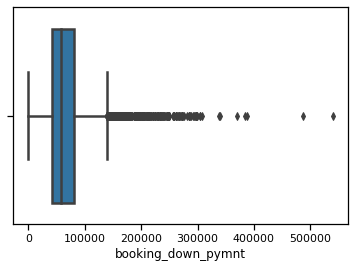

In [31]:
for i in integer_columns:
  plt.figure()
  sns.boxplot(x=df1[i])

In [32]:
max_km=df1['kms_run'].max()
max_km

996609

In [33]:
df1=df1[df1['kms_run']<max_km]
df1.shape

(6398, 26)

In [34]:
df1=df1[df1['sale_price']<2500000]
df1.shape

(6394, 26)

In [35]:
df1=df1[df1['times_viewed']<20000]
df1.shape

(6387, 26)

In [36]:
df1=df1[df1['yr_mfr']>2005]
df1.shape

(6348, 26)

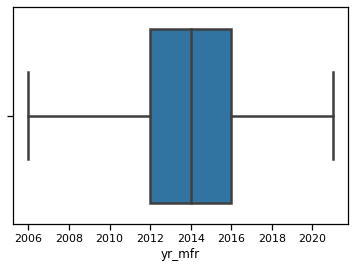

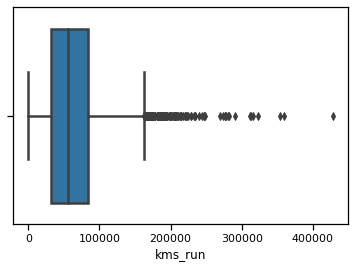

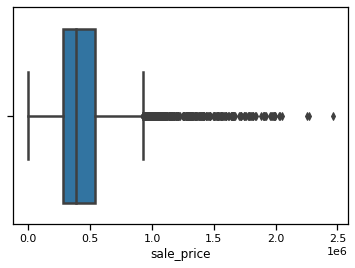

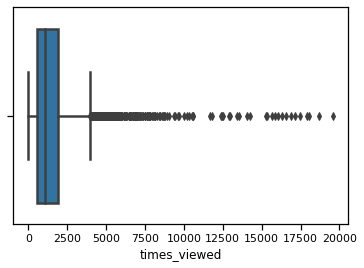

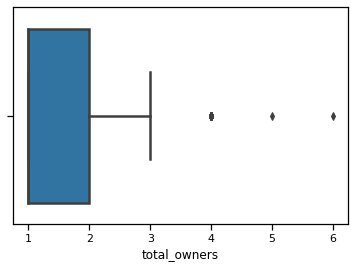

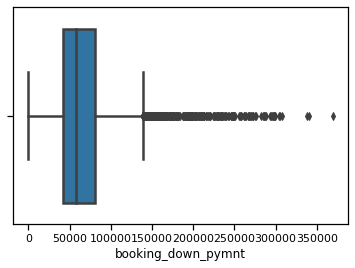

In [37]:
for i in integer_columns:
  plt.figure()
  sns.boxplot(x=df1[i])

C:\Users\VATAN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\VATAN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\VATAN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

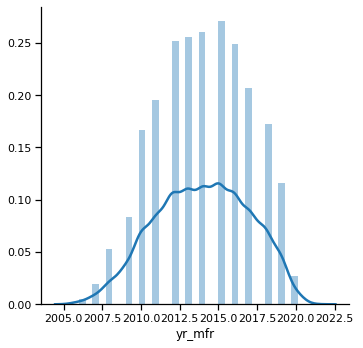

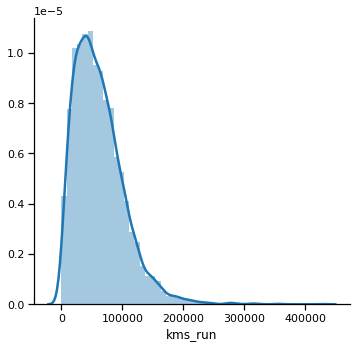

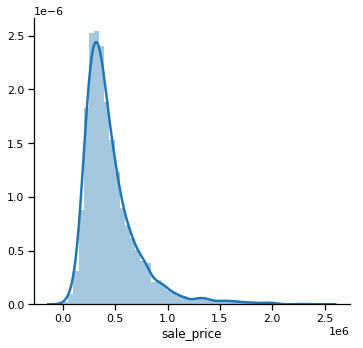

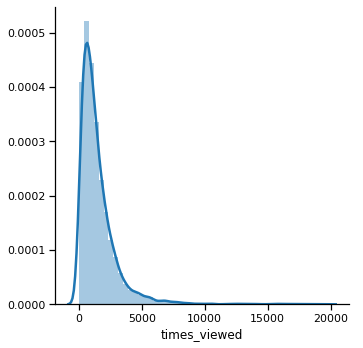

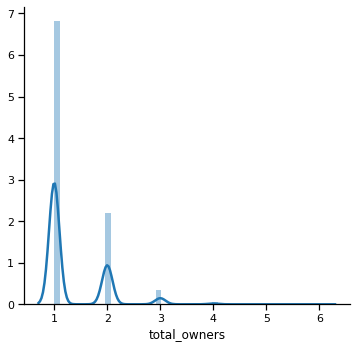

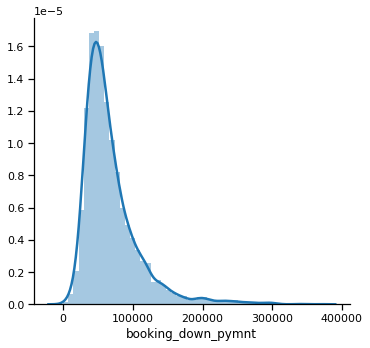

In [38]:
for col1 in integer_columns:
  sns.FacetGrid(df1,height=5).map(sns.distplot,col1).add_legend()

<Figure size 432x288 with 0 Axes>

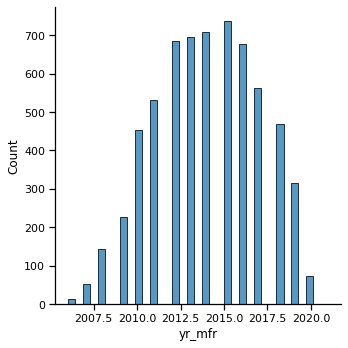

<Figure size 432x288 with 0 Axes>

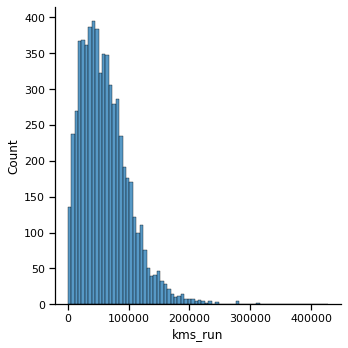

<Figure size 432x288 with 0 Axes>

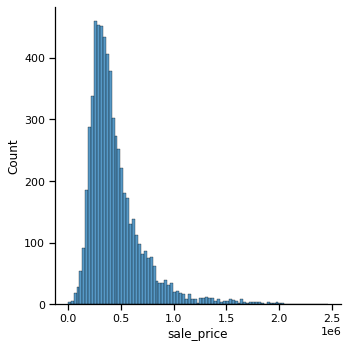

<Figure size 432x288 with 0 Axes>

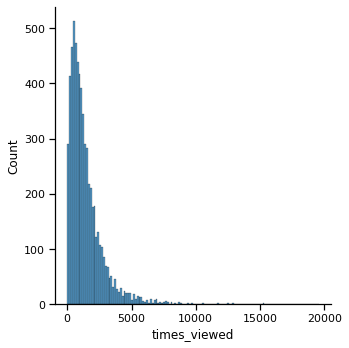

<Figure size 432x288 with 0 Axes>

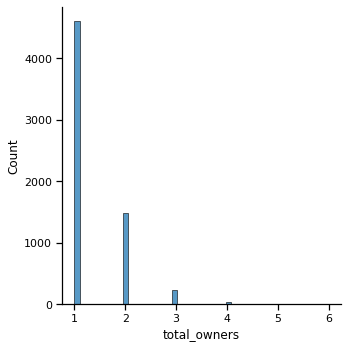

<Figure size 432x288 with 0 Axes>

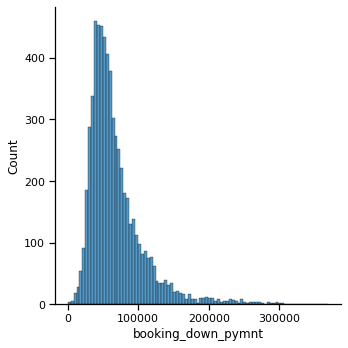

In [39]:
for i in integer_columns:
  plt.figure()
  sns.displot(df1[i])

# 9.Exploratory Data Analysis

<AxesSubplot:xlabel='kms_run', ylabel='sale_price'>

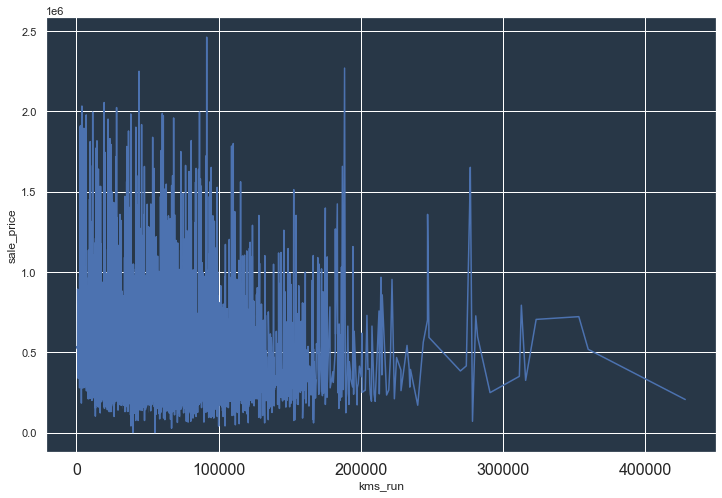

In [40]:
plt.figure(figsize=(12,8))
sns.set(rc={'axes.facecolor':'#283747','axes.grid': True,'xtick.labelsize':16})
sns.lineplot(x='kms_run',y='sale_price',data=df1)

<AxesSubplot:xlabel='times_viewed', ylabel='sale_price'>

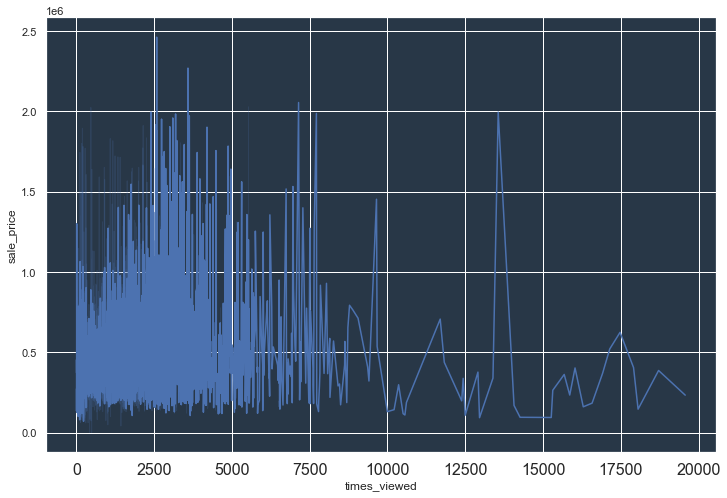

In [41]:
plt.figure(figsize=(12,8))
sns.set(rc={'axes.facecolor':'#283747','axes.grid': True,'xtick.labelsize':16})
sns.lineplot(x='times_viewed',y='sale_price',data=df1)



<AxesSubplot:xlabel='yr_mfr', ylabel='sale_price'>

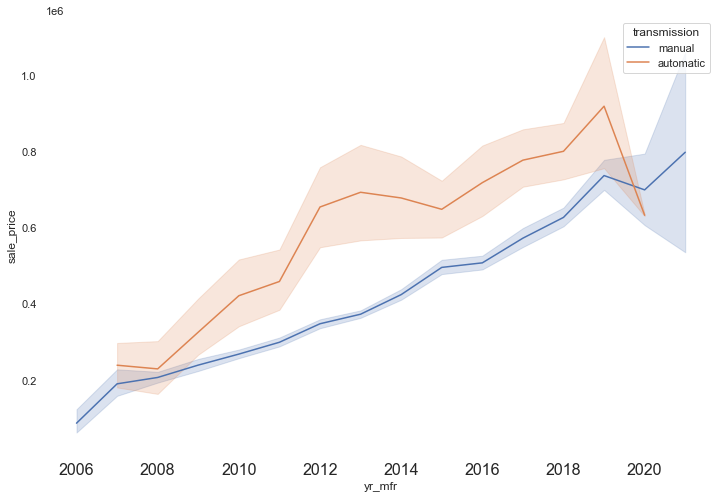

In [42]:
plt.figure(figsize=(12,8))
sns.set(rc={'axes.facecolor':'white','axes.grid': True,'xtick.labelsize':16})
sns.lineplot(x='yr_mfr',y='sale_price',data=df1,hue='transmission')

<AxesSubplot:xlabel='yr_mfr', ylabel='sale_price'>

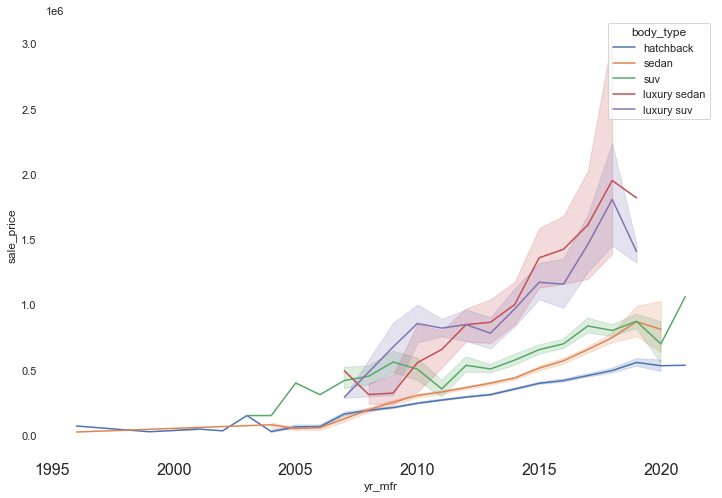

In [43]:
plt.figure(figsize=(12,8))
sns.set(rc={'axes.facecolor':'white','axes.grid': False,'xtick.labelsize':16})
sns.lineplot(x='yr_mfr',y='sale_price',data=df,hue='body_type')

<AxesSubplot:xlabel='total_owners', ylabel='sale_price'>

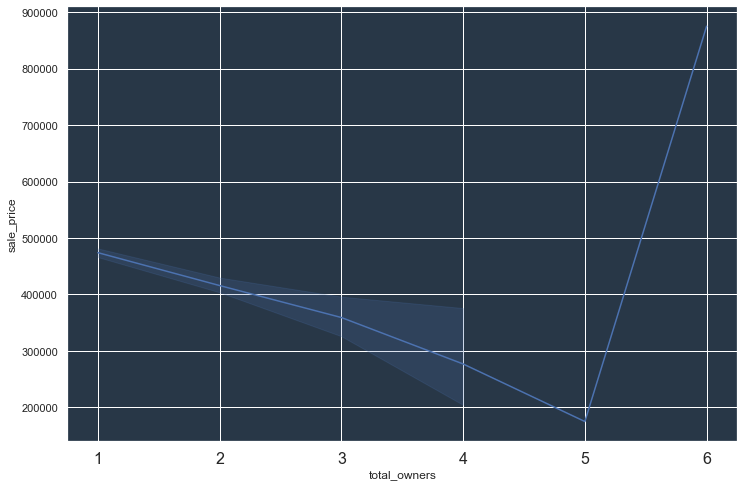

In [44]:
plt.figure(figsize=(12,8))
sns.set(rc={'axes.facecolor':'#283747','axes.grid': True,'xtick.labelsize':16})
sns.lineplot(x='total_owners',y='sale_price',data=df1)

C:\Users\VATAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='body_type', ylabel='count'>

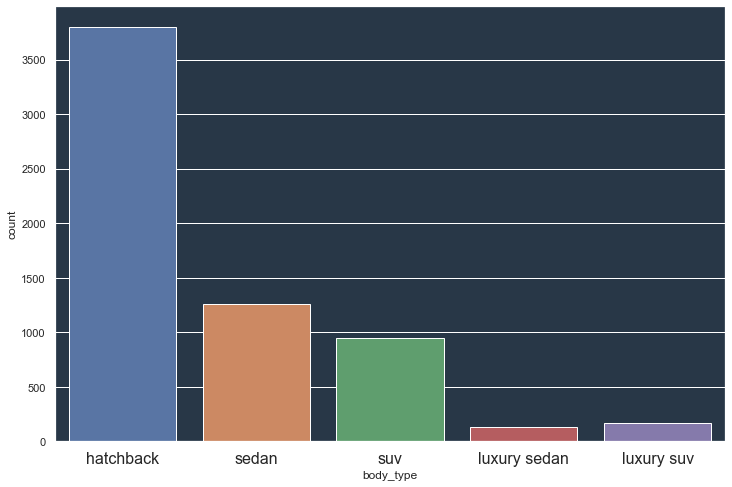

In [45]:
plt.figure(figsize=(12,8))
sns.set(rc={'axes.facecolor':'#283747','axes.grid': True,'xtick.labelsize':16})
sns.countplot(df['body_type'])

C:\Users\VATAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='body_type', ylabel='sale_price'>

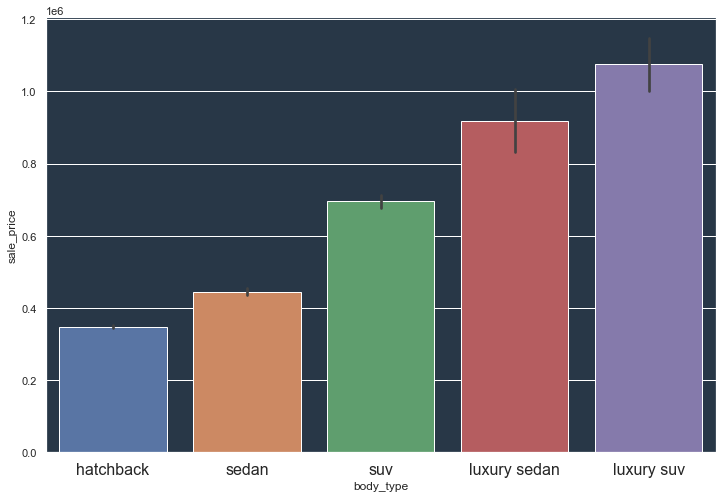

In [46]:
plt.figure(figsize=(12,8))
sns.set(rc={'axes.facecolor':'#283747','axes.grid': True,'xtick.labelsize':16})
sns.barplot(df['body_type'],df['sale_price'])

C:\Users\VATAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='transmission', ylabel='sale_price'>

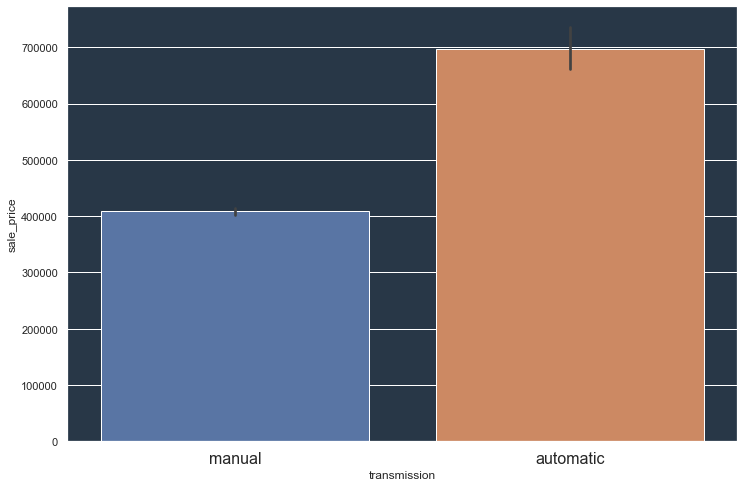

In [47]:
plt.figure(figsize=(12,8))
sns.set(rc={'axes.facecolor':'#283747','axes.grid': True,'xtick.labelsize':16})
sns.barplot(df['transmission'],df['sale_price'])

C:\Users\VATAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'noida'),
  Text(1, 0, 'gurgaon'),
  Text(2, 0, 'bengaluru'),
  Text(3, 0, 'new delhi'),
  Text(4, 0, 'mumbai'),
  Text(5, 0, 'pune'),
  Text(6, 0, 'hyderabad'),
  Text(7, 0, 'chennai'),
  Text(8, 0, 'kolkata'),
  Text(9, 0, 'ahmedabad'),
  Text(10, 0, 'faridabad'),
  Text(11, 0, 'ghaziabad'),
  Text(12, 0, 'lucknow')])

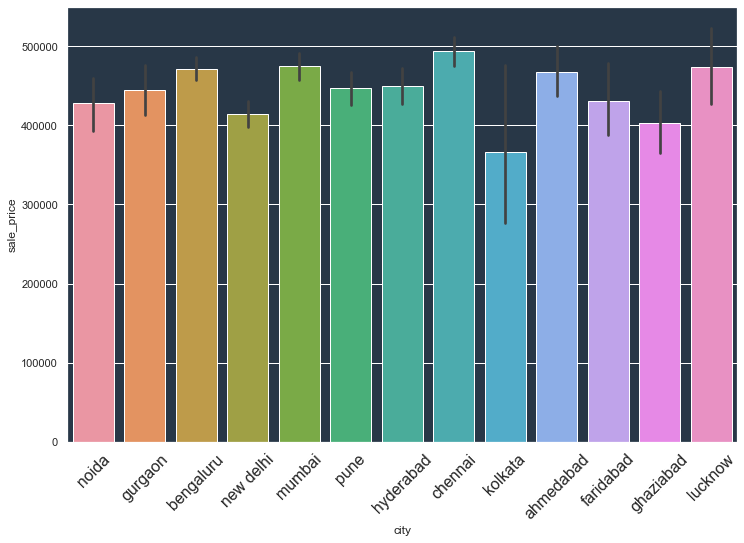

In [48]:
plt.figure(figsize=(12,8))
sns.set(rc={'axes.facecolor':'#283747','axes.grid': True,'xtick.labelsize':16})
sns.barplot(df['city'],df['sale_price'])
plt.xticks(rotation=45)

# 10.Loading and Handling Test Data

In [49]:
df_test=pd.read_csv('test.csv')

In [50]:
df_test.shape

(1000, 30)

In [51]:
df_test.head()

,id,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,...,total_owners,broker_quote,original_price,car_rating,ad_created_on,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail
0,1,maruti swift dzire,2012,petrol,69029,364299,pune,2068,sedan,manual,...,3,363529,365029.0,great,2021-03-16T05:00:49.555,True,8462,54645,False,False
1,2,hyundai eon,2013,petrol,45721,216799,gurgaon,903,hatchback,manual,...,1,205738,NaN,great,2021-03-10T12:08:11.905,True,5036,32520,False,False
2,3,honda amaze,2013,diesel,37395,387399,pune,2809,sedan,manual,...,1,382667,NaN,great,2021-03-15T12:03:30.041,True,8998,58110,True,False
3,4,hyundai i20,2012,petrol,37652,364699,bengaluru,1054,hatchback,manual,...,3,335740,NaN,great,2021-04-09T11:16:26.157,True,8471,54705,True,False
4,5,hyundai creta,2017,diesel,53648,1082011,lucknow,2927,suv,automatic,...,1,1119840,1125840.0,great,2021-04-01T07:24:31.712,True,25132,162302,False,False


In [52]:
df_test.isnull().sum()

id                       0
car_name                 0
yr_mfr                   0
fuel_type                0
kms_run                  0
sale_price               0
city                     0
times_viewed             0
body_type               13
transmission            82
variant                  0
assured_buy              0
registered_city          2
registered_state         2
is_hot                   0
rto                      0
source                  12
make                     0
model                    0
car_availability        78
total_owners             0
broker_quote             0
original_price         455
car_rating               2
ad_created_on            0
fitness_certificate      0
emi_starts_from          0
booking_down_pymnt       0
reserved                 0
warranty_avail           0
dtype: int64

In [53]:
df_test1=remove(df_test)

In [54]:
df_test1.shape

(1000, 26)

In [55]:
df_test1.head()

,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,...,make,model,car_availability,total_owners,car_rating,ad_created_on,fitness_certificate,booking_down_pymnt,reserved,warranty_avail
0,maruti swift dzire,2012,petrol,69029,364299,pune,2068,sedan,manual,vxi 1.2 bs iv,...,maruti,swift dzire,in_stock,3,great,2021-03-16T05:00:49.555,True,54645,False,False
1,hyundai eon,2013,petrol,45721,216799,gurgaon,903,hatchback,manual,era plus,...,hyundai,eon,in_stock,1,great,2021-03-10T12:08:11.905,True,32520,False,False
2,honda amaze,2013,diesel,37395,387399,pune,2809,sedan,manual,1.5 smt i dtec,...,honda,amaze,in_stock,1,great,2021-03-15T12:03:30.041,True,58110,True,False
3,hyundai i20,2012,petrol,37652,364699,bengaluru,1054,hatchback,manual,magna o 1.2,...,hyundai,i20,in_transit,3,great,2021-04-09T11:16:26.157,True,54705,True,False
4,hyundai creta,2017,diesel,53648,1082011,lucknow,2927,suv,automatic,1.6 crdi sx plus auto,...,hyundai,creta,in_stock,1,great,2021-04-01T07:24:31.712,True,162302,False,False


In [56]:
cateogry_columns=df_test1.select_dtypes(include=['object']).columns.tolist()
integer_columns=df_test1.select_dtypes(include=['int64','float64']).columns.tolist()

for column in df_test1:
    if df_test1[column].isnull().any():
        if(column in cateogry_columns):
            df_test1[column]=df_test1[column].fillna(df_test1[column].mode()[0])
        else:
            df_test1[column]=df_test1[column].fillna(df_test1[column].mean)

In [57]:
df_test1.isnull().sum()

car_name               0
yr_mfr                 0
fuel_type              0
kms_run                0
sale_price             0
city                   0
times_viewed           0
body_type              0
transmission           0
variant                0
assured_buy            0
registered_city        0
registered_state       0
is_hot                 0
rto                    0
source                 0
make                   0
model                  0
car_availability       0
total_owners           0
car_rating             0
ad_created_on          0
fitness_certificate    0
booking_down_pymnt     0
reserved               0
warranty_avail         0
dtype: int64

In [58]:
X_train=df1.drop('sale_price',axis=1)
Y_train=df1['sale_price'].values

In [59]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()


num_d = X_train.select_dtypes(exclude=['object'])


X_train[num_d.columns] = sc.fit_transform(num_d)



In [60]:
X_train.head()

,car_name,yr_mfr,fuel_type,kms_run,city,times_viewed,body_type,transmission,variant,assured_buy,...,make,model,car_availability,total_owners,car_rating,ad_created_on,fitness_certificate,booking_down_pymnt,reserved,warranty_avail
0,maruti swift,0.349191,petrol,-1.310500,noida,10.828115,hatchback,manual,lxi opt,0.445437,...,maruti,swift,in_stock,1.191763,great,2021-04-04T07:09:18.583,0.121268,-0.255921,-0.520941,-0.171318
1,maruti alto 800,0.684490,petrol,-0.945148,noida,0.738056,hatchback,manual,lxi,0.445437,...,maruti,alto 800,in_stock,-0.564345,great,2021-03-22T14:07:32.833,0.121268,-0.704714,-0.520941,-0.171318
2,hyundai grand i10,1.019789,petrol,-0.937909,noida,-0.562284,hatchback,manual,sports 1.2 vtvt,0.445437,...,hyundai,grand i10,in_stock,-0.564345,great,2021-03-20T05:36:31.311,0.121268,0.082993,-0.520941,-0.171318
3,maruti swift,-0.321407,diesel,-0.556015,noida,3.150636,hatchback,manual,vdi,0.445437,...,maruti,swift,in_stock,-0.564345,great,2021-01-21T12:59:19.299,0.121268,-0.546950,-0.520941,-0.171318
4,hyundai grand i10,0.349191,petrol,-0.969147,noida,1.083429,hatchback,manual,magna 1.2 vtvt,-2.244986,...,hyundai,grand i10,in_stock,-0.564345,great,2021-04-01T13:33:40.733,0.121268,-0.348353,-0.520941,-0.171318


In [61]:
X_train.nunique()

car_name                176
yr_mfr                   16
fuel_type                 5
kms_run                6193
city                     13
times_viewed           2945
body_type                 5
transmission              2
variant                 853
assured_buy               2
registered_city         230
registered_state         16
is_hot                    2
rto                     255
source                    3
make                     25
model                   176
car_availability          4
total_owners              6
car_rating                4
ad_created_on          6347
fitness_certificate       2
booking_down_pymnt     4024
reserved                  2
warranty_avail            2
dtype: int64

In [62]:
from sklearn import preprocessing
  

label_encoder = preprocessing.LabelEncoder()
  
for i in category_columns:
  X_train[i]= label_encoder.fit_transform(X_train[i])
  


In [63]:
X_train.head()

,car_name,yr_mfr,fuel_type,kms_run,city,times_viewed,body_type,transmission,variant,assured_buy,...,make,model,car_availability,total_owners,car_rating,ad_created_on,fitness_certificate,booking_down_pymnt,reserved,warranty_avail
0,99,0.349191,2,-1.310500,11,10.828115,0,1,503,0.445437,...,13,143,0,1.191763,2,5154,1,-0.255921,-0.520941,-0.171318
1,82,0.684490,2,-0.945148,11,0.738056,0,1,492,0.445437,...,13,10,0,-0.564345,2,4057,1,-0.704714,-0.520941,-0.171318
2,46,1.019789,2,-0.937909,11,-0.562284,0,1,600,0.445437,...,7,69,0,-0.564345,2,3768,1,0.082993,-0.520941,-0.171318
3,99,-0.321407,0,-0.556015,11,3.150636,0,1,677,0.445437,...,13,143,0,-0.564345,2,1014,1,-0.546950,-0.520941,-0.171318
4,46,0.349191,2,-0.969147,11,1.083429,0,1,517,-2.244986,...,7,69,0,-0.564345,2,4986,1,-0.348353,-0.520941,-0.171318


In [64]:
X_train1=X_train.values

In [65]:
X_train1

array([[ 9.90000000e+01,  3.49190547e-01,  2.00000000e+00, ...,
        -2.55921460e-01, -5.20941390e-01, -1.71317731e-01],
       [ 8.20000000e+01,  6.84489532e-01,  2.00000000e+00, ...,
        -7.04714172e-01, -5.20941390e-01, -1.71317731e-01],
       [ 4.60000000e+01,  1.01978852e+00,  2.00000000e+00, ...,
         8.29931357e-02, -5.20941390e-01, -1.71317731e-01],
       ...,
       [ 1.65000000e+02, -1.66260337e+00,  0.00000000e+00, ...,
        -1.49755442e-01, -5.20941390e-01, -1.71317731e-01],
       [ 1.44000000e+02, -9.92005395e-01,  0.00000000e+00, ...,
        -1.13346155e+00, -5.20941390e-01, -1.71317731e-01],
       [ 4.60000000e+01,  3.49190547e-01,  0.00000000e+00, ...,
        -3.91041847e-01, -5.20941390e-01,  5.83710743e+00]])

**FOr Testing data**

In [66]:
X_test=df_test1.drop('sale_price',axis=1)
Y_test=df_test1['sale_price'].values

In [67]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()


num_d = X_test.select_dtypes(exclude=['object'])


X_test[num_d.columns] = sc.fit_transform(num_d)



In [68]:

from sklearn import preprocessing
  

label_encoder = preprocessing.LabelEncoder()
  

for i in category_columns:
  X_test[i]= label_encoder.fit_transform(X_test[i])
  


In [69]:
X_test.head()

,car_name,yr_mfr,fuel_type,kms_run,city,times_viewed,body_type,transmission,variant,assured_buy,...,make,model,car_availability,total_owners,car_rating,ad_created_on,fitness_certificate,booking_down_pymnt,reserved,warranty_avail
0,75,-0.589528,2,0.104385,12,0.155016,3,1,304,0.444528,...,12,92,0,2.724196,2,530,1,-0.295997,-0.517134,-0.172818
1,29,-0.265077,2,-0.399505,5,-0.276043,0,1,153,0.444528,...,6,36,0,-0.550078,2,457,1,-0.769566,-0.517134,-0.172818
2,18,-0.265077,0,-0.579503,12,0.429192,3,1,44,0.444528,...,5,10,0,-0.550078,2,520,1,-0.221832,1.933736,-0.172818
3,34,-0.589528,2,-0.573947,1,-0.220172,0,1,217,0.444528,...,6,52,1,2.724196,2,885,1,-0.294713,1.933736,-0.172818
4,27,1.032728,0,-0.228133,8,0.472853,4,0,55,0.444528,...,6,28,0,-0.550078,2,762,1,2.008320,-0.517134,-0.172818


In [70]:
X_test1=X_test.values
X_test1

array([[75.        , -0.58952782,  2.        , ..., -0.29599737,
        -0.51713356, -0.17281816],
       [29.        , -0.26507662,  2.        , ..., -0.7695663 ,
        -0.51713356, -0.17281816],
       [18.        , -0.26507662,  0.        , ..., -0.22183165,
         1.93373641, -0.17281816],
       ...,
       [68.        ,  1.35717934,  2.        , ...,  0.34067192,
        -0.51713356, -0.17281816],
       [18.        ,  0.38382576,  2.        , ..., -0.17977231,
         1.93373641, -0.17281816],
       [60.        ,  0.70827695,  2.        , ..., -0.55349044,
        -0.51713356, -0.17281816]])

In [71]:
Y_test

array([ 364299,  216799,  387399,  364699, 1082011,  695999,  286399,
        283299,  346399,  205299, 1211594,  715299,  499099,  203899,
        224999,  307999,  157399,  383999,  620299,  188399,  450000,
        210099, 1155236,  242299,  270799,  387899,  417399,  651999,
        305099,  830699,  504899,   89099,  802199, 1389758,  397799,
        394099,  564299,  546199,  288499,  349299,  570399,  541499,
        240899,  443099,  694399,  180000,  416299,  141399,  500000,
        237199,  560999,  616799,  465599,  386799,  382799,  377299,
        626999,  336699,  567199,  520499,  249599,  487499,  419199,
       1248358,  340199,  410599,  366799,  571799,  438299, 1447530,
        415699,  401799,  182199,   89000,  312499, 1490758,  639499,
        102499,  673999,  111000,  267899,  491499,  371899,  726099,
       1112008,  595999,  509099,  444499,  367999, 1367538,  227099,
        328099,  302799,  450399,  359899, 1129683,  200000,  493399,
        490999,  234

In [72]:
Y_train

array([386399, 265499, 477699, ..., 415000, 150000, 350000], dtype=int64)

# **11.Training our Models**

#### A) Linear Regression

In [73]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train1,Y_train)

LinearRegression()

In [74]:
y_pred=lr.predict(X_test1)

In [75]:
tsc1=lr.score(X_test1,Y_test)
tsc1

0.9817375483261754

In [76]:
sc1=lr.score(X_train1,Y_train)
sc1

0.9999999999969837

#### B) Lasso Regression

In [77]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso()
lasso_reg.fit(X_train1,Y_train)

Lasso()

In [78]:
y_pred2=lasso_reg.predict(X_test1)

In [79]:
tsc2=lasso_reg.score(X_train1,Y_train)
tsc2

0.9999929336937445

In [80]:
sc2=lasso_reg.score(X_test1,Y_test)
sc2

0.9815536630023566

#### C) Ridge Regression

In [81]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge()
ridge_reg.fit(X_train1,Y_train)

Ridge()

In [82]:
y_pred3=ridge_reg.predict(X_test1)

In [83]:
tsc3=ridge_reg.score(X_train1,Y_train)
tsc3

0.9999999456417985

In [84]:
sc3=ridge_reg.score(X_test1,Y_test)
sc3

0.9816965500055741

#### D) Random Forest Regression

In [85]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 20, random_state = 0)
regressor.fit(X_train1, Y_train)

RandomForestRegressor(n_estimators=20, random_state=0)

In [86]:
y_pred4=regressor.predict(X_test1)

In [87]:
tsc4=regressor.score(X_train1,Y_train)
tsc4

0.9999242076965718

In [88]:
sc4=regressor.score(X_test1,Y_test)
sc4

0.9442546464297783

#### E) XGBOOST Regressor

In [89]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train1, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [90]:
y_pred5=xgb.predict(X_test1)

In [91]:
tsc5=regressor.score(X_train1,Y_train)
tsc5

0.9999242076965718

In [92]:
sc5=regressor.score(X_test1,Y_test)
sc5

0.9442546464297783

# 12.Model Evaluation

In [93]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
def metric(y_test,y_predict):
    mae=mean_absolute_error(y_test,y_predict) #mean_absolute_error
    mse=mean_squared_error(y_test,y_predict) #mean_squared_error
    rmse=mean_squared_error(y_test,y_predict,squared=False)
    return [mae,mse,rmse]

In [94]:
linearregressoin=metric(Y_test,y_pred)
linearregressoin.append(sc1)
linearregressoin.append(tsc1)
linearregressoin

[26448.01238332684,
 1771640806.5228267,
 42090.86369418934,
 0.9999999999969837,
 0.9817375483261754]

In [95]:
lassoregression=metric(Y_test,y_pred2)
lassoregression.append(sc2)
lassoregression.append(tsc2)
lassoregression

[25923.51501300195,
 1789479525.5084612,
 42302.24019491712,
 0.9815536630023566,
 0.9999929336937445]

In [96]:
Ridgeregression=metric(Y_test,y_pred3)
Ridgeregression.append(sc3)
Ridgeregression.append(tsc3)
Ridgeregression

[26446.516419076255,
 1775618054.434197,
 42138.08318414824,
 0.9816965500055741,
 0.9999999456417985]

In [97]:
RandomForestRegressor=metric(Y_test,y_pred4)
RandomForestRegressor.append(sc4)
RandomForestRegressor.append(tsc4)
RandomForestRegressor

[28538.73115,
 5407857878.173094,
 73538.13893601805,
 0.9442546464297783,
 0.9999242076965718]

In [98]:
XGBRegressor=metric(Y_test,y_pred5)
XGBRegressor.append(sc5)
XGBRegressor.append(tsc5)
XGBRegressor

[27788.3292578125,
 4112711285.220686,
 64130.42402183761,
 0.9442546464297783,
 0.9999242076965718]

In [99]:
algorithms=['Linear Regression','Lasso Regression','Ridge Regression','Random Forest Regression','XGBoost Regression']
eval=pd.DataFrame([linearregressoin,lassoregression,Ridgeregression,RandomForestRegressor,XGBRegressor],columns=['Mean Squared Error','Mean Absolute Error','Root Mean SquareError','Test Score','Train Score'],index=algorithms)
eval

,Mean Squared Error,Mean Absolute Error,Root Mean SquareError,Test Score,Train Score
Linear Regression,26448.012383,1.771641e+09,42090.863694,1.000000,0.981738
Lasso Regression,25923.515013,1.789480e+09,42302.240195,0.981554,0.999993
Ridge Regression,26446.516419,1.775618e+09,42138.083184,0.981697,1.000000
Random Forest Regression,28538.731150,5.407858e+09,73538.138936,0.944255,0.999924
XGBoost Regression,27788.329258,4.112711e+09,64130.424022,0.944255,0.999924


In [100]:
score=[]
for i in range(5):
  score.append(eval.iloc[:,3][i])
score

[0.9999999999969837,
 0.9815536630023566,
 0.9816965500055741,
 0.9442546464297783,
 0.9442546464297783]

#####  Model Performances

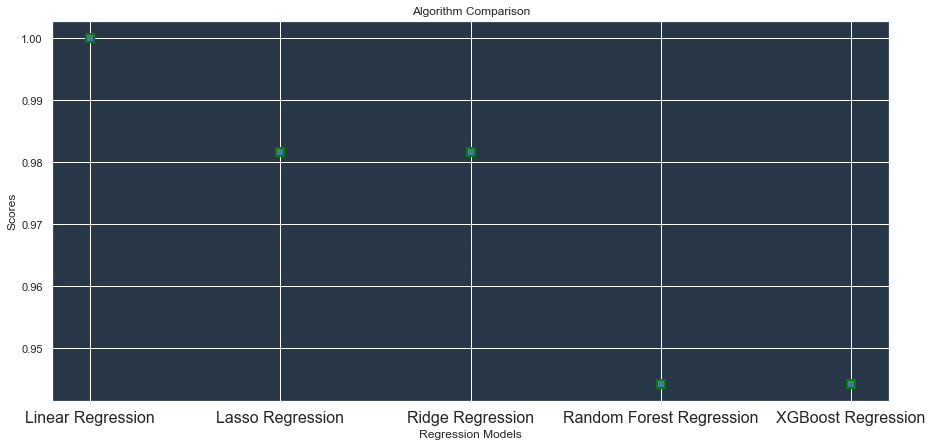

,score
Linear Regression,1.000000
Lasso Regression,0.981554
Ridge Regression,0.981697
Random Forest Regression,0.944255
XGBoost Regression,0.944255


In [101]:

plt.figure(figsize=(15,7))
plt.scatter(algorithms,score,linewidth=2,s=50,marker='s',edgecolors='green')

plt.xlabel("Regression Models") 
plt.ylabel("Scores") 
plt.title("Algorithm Comparison")
plt.show()
df=pd.DataFrame(score,index=algorithms,columns=['score'])
df

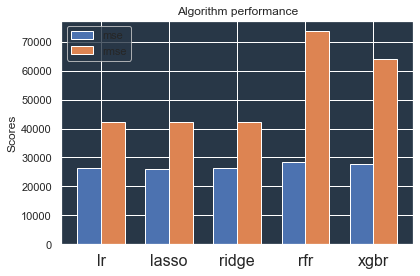

,Linear Regression,Lasso Regression,Ridge Regression,Random Forest Regression,XGBoost Regression
mse,26448.012383,25923.515013,26446.516419,28538.731150,27788.329258
rmse,42090.863694,42302.240195,42138.083184,73538.138936,64130.424022


In [102]:
algo=['lr','lasso','ridge','rfr','xgbr']
ind = np.arange(len(score))  
width = 0.35  

fig,ax = plt.subplots()


rects1 = ax.bar(ind - width/2, eval['Mean Squared Error'], width, 
                label='mse')
rects2 = ax.bar(ind + width/2, eval['Root Mean SquareError'], width, 
                label='rmse')

ax.set_ylabel('Scores')
ax.set_title('Algorithm performance')
ax.set_xticks(ind)
ax.set_xticklabels(algo)
ax.legend()


def autolabel(rects, xpos='center'):
   

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  
                    textcoords="offset points",  
                    ha=ha[xpos], va='bottom')


fig.tight_layout()

plt.show()

df=pd.DataFrame([eval['Mean Squared Error'],eval['Root Mean SquareError']],columns=algorithms,index=['mse','rmse'])
df


# **13.Conclusion**


We can observe from above that sale_price,emi_starts_from,booking_down_pymnt original_price ,broker_quote are highly correlated and sale_price is our target variable.

Below are the results observed in all the Five models

**Linear Regression**
    
*    Test Score = 0.999997
  	
*    Train Score = 0.981738

**Lasso Regression**
    
*    Test Score = 0.981554
  	
*    Train Score = 0.999993
				
**Ridge Regression**
    
*    Test Score = 0.981697
  	
*    Train Score = 0.9999999456

**Random Forest Regression**
    
*    Test Score = 0.944255
  	
*    Train Score = 0.999924	

**XGBoost Regression**

*    Test Score = 0.944255
  	
*    Train Score = 0.999924

From these above results it is clear that Linear Regression is perhaps worthy of further study on this problem.

Among all the methods Linear Regression is the best which gives best results and we  can observe it's score (0.9999999999969837). 




